<a href="https://colab.research.google.com/github/cxmedeiros/Bioinspirada/blob/main/melhorar_funcoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Otimização de Função** ❗


Implementar um Estratégia Evolutiva e um Algoritmo Genético em qualquer linguagem de programação e compará-los.

## **Funções:**📊


**Ackley Function**: Na sua forma bidimensional, é caracterizado por uma região externa quase plana e um grande buraco no centro. A função representa um risco para algoritmos de otimização, particularmente algoritmos de escalada, ficarem presos em um de seus muitos mínimos locais.

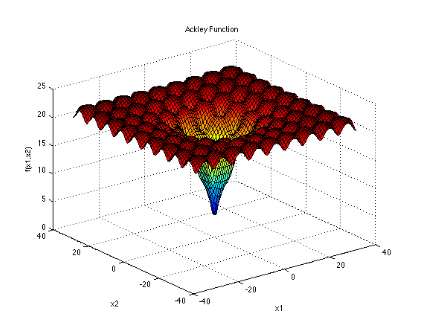

**Rastrigin Function**: A função Rastrigin possui vários mínimos locais. É altamente multimodal, mas as localizações dos mínimos são distribuídas regularmente.

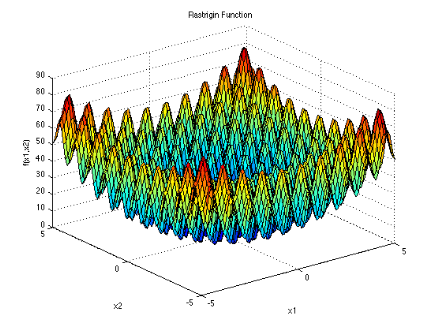

**Schwefel Function**:A função de Schwefel é complexa, com muitos mínimos locais.

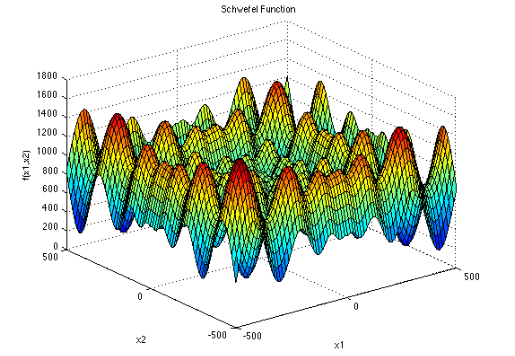

**Rosenbrock Function**: Também conhecida como função Valley ou Banana, é um problema de teste popular para algoritmos de otimização baseados em gradiente.

A função é unimodal e o mínimo global encontra-se num vale estreito e parabólico. Contudo, embora este vale seja fácil de encontrar, a convergência para o mínimo é difícil.

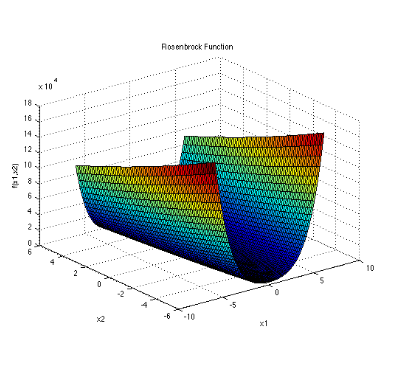


## **Grupo:** 📚
*   Breno Mendes (bmmuc)
* Camila Xavier (cxm)
* Victor Silva (vsmo)


In [ ]:
import numpy as np
import os
def ackley_function(x):
  a = 20
  b = 0.2
  c = 2 * np.pi
  d = len(x)
  sum_sq_term = -a * np.exp(-b * np.sqrt(sum(x**2) / d))
  cos_term = -np.exp(sum(np.cos(c * x) / d))
  return sum_sq_term + cos_term + a + np.e


def rastrigin_function(x):
  A = 10
  d = len(x)
  return A * d + sum(x_i**2 - A * np.cos(2 * np.pi * x_i) for x_i in x)


def schwefel_function(x):
  d = len(x)
  return 418.9829 * d - sum(x_i * np.sin(np.sqrt(abs(x_i))) for x_i in x)


def rosenbrock_function(x):
  d = len(x)
  return sum(100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(d - 1))

# Implementação da estratégia evolutiva 💻

In [ ]:
import time
class EvolutionaryStrategy:
    def __init__(self, chromosome_length, population_size, generations, fitness_function, mutation_rate=0.1, convergence_threshold= 0.01, convergence_generations=1000):
        self.chromosome_length = chromosome_length
        self.population_size = population_size
        self.generations = generations
        self.fitness_function = fitness_function
        self.mutation_rate = mutation_rate  # Nova taxa de mutação
        self.population = self.initialize_population()
        self.best_fitness_history = []
        os.makedirs(f'{self.fitness_function.__name__}', exist_ok=True)
        os.makedirs(f'{self.fitness_function.__name__}/ES', exist_ok=True)
        self.id = len(os.listdir(f'{self.fitness_function.__name__}'))
        self._GLOBAL_TAU = 1 / np.sqrt(2 * np.sqrt(chromosome_length))
        self._LOCAL_TAU = 1 / np.sqrt(2 * chromosome_length)
        self._MP_ES = 1 / chromosome_length
        self.execution_times = []
        self.generation_counts = []
        self.fitness_counts = []
        self.convergence_threshold = convergence_threshold
        self.convergence_generations = convergence_generations

        self.has_converged = False


    def initialize_population(self):
        return np.random.uniform(-5, 5, (self.population_size, self.chromosome_length + 1))

    def mutation_es(self, chromosome):
        d = len(chromosome) - 1
        chromosome[d] += self._GLOBAL_TAU * np.random.normal(0, 1)
        chromosome[d] = max(min(chromosome[d], 1), 0.01)

        for i in range(d):
            if np.random.rand() < self.mutation_rate:
                chromosome[i] += chromosome[d] * np.random.normal(0, 1)
        return chromosome


    def evaluate_fitness(self):
        fitness_values = np.array([-self.fitness_function(individual[:-1]) for individual in self.population])
        return fitness_values

    def select(self, fitness_values):
        best_index = np.argmax(fitness_values)
        return self.population[best_index], fitness_values[best_index]

    def run(self):
        total_executions = 30
        for exec_number in range(total_executions):
            start_time = time.time()
            self.population = self.initialize_population()  # Reinicia a população para cada execução
            local_best_fitness_history = []  # Histórico de melhor fitness para esta execução

            for generation in range(self.generations):
                new_population = []
                fitness_values = self.evaluate_fitness()
                best_index = np.argmax(fitness_values)
                best_individual = self.population[best_index].copy()
                best_fitness = fitness_values[best_index]
                local_best_fitness_history.append(best_fitness)

                for _ in range(self.population_size):
                    # Mutação do melhor indivíduo para manter a diversidade
                    mutated_individual = self.mutation_es(best_individual.copy())
                    new_population.append(mutated_individual)

                self.population = np.array(new_population)
                if self.check_convergence(local_best_fitness_history):
                    print(f"Converged at execution {exec_number+1}, generation {generation}. Best fitness: {best_fitness}")
                    break

                if generation % 100 == 0 or generation == self.generations - 1:
                    print(f"Execution {exec_number+1}, Generation {generation}, Best fitness: {best_fitness}")

            exec_time = time.time() - start_time
            self.execution_times.append(exec_time)
            self.generation_counts.append(generation + 1)  # Ajustado para contar a geração corretamente
            self.fitness_counts.append(min(local_best_fitness_history))  # Armazena o melhor fitness desta execução

        self.save_results()  # Salva os resultados após todas as execuções

    def check_convergence(self, local_best_fitness_history):
      if len(local_best_fitness_history) > self.convergence_generations:
          recent_improvements = [abs(local_best_fitness_history[i] - local_best_fitness_history[i-1]) for i in range(-self.convergence_generations, 0)]
          mean_improvement = np.mean(recent_improvements)
          if mean_improvement < self.convergence_threshold:
              self.has_converged = True
              return True
      return False

    def save_results(self):
        counter = [1] * len(self.execution_times)

        meanGen = np.average(self.generation_counts)
        stdGen = np.std(self.generation_counts)
        meanFitness = np.average(self.fitness_counts)
        stdFitness = np.std(self.fitness_counts)
        meanExecTime = np.average(self.execution_times)
        nConvergence = sum(counter)
        meanConvergence = np.average(counter)

        content = f"""Em que iteração o algoritmo convergiu, em média: {round(meanGen, 3)}
Desvio Padrão de em quantas iterações o algoritmo convergiu: {round(stdGen, 3)}
Fitness médio alcançado nas execuções: {meanFitness}
Desvio padrão dos Fitness alcançados nas execuções: {round(stdFitness, 3)}
Em quantas execuções o algoritmo convergiu: {str(min(nConvergence, len(self.execution_times)))}/{len(self.execution_times)}
Número de indivíduos que convergiram: {nConvergence}
Número de indivíduos que convergiram por execução, em média: {round(meanConvergence, 3)}
Tempo médio de execução das execuções: {round(meanExecTime, 3)} segundos"""

        with open(f'./{self.fitness_function.__name__}/ES/es_results_summary-{self.id}.txt', 'w') as file:
            file.write(content)
        print(f"Results saved to {self.fitness_function.__name__}/ES/es_results_summary-{self.id}.txt")


es = EvolutionaryStrategy(
    chromosome_length=31,
    population_size=500,
    generations=10000,
    mutation_rate=0.1,
    fitness_function=ackley_function
)

es.run()

Execution 1, Generation 0, Best fitness: -9.029802698514882
Execution 1, Generation 100, Best fitness: -0.009864446911468594
Execution 1, Generation 200, Best fitness: -0.0028637258616375227
Execution 1, Generation 300, Best fitness: -0.0038782628811344644
Execution 1, Generation 400, Best fitness: -0.0063491934494703806
Execution 1, Generation 500, Best fitness: -0.005477359841247864
Execution 1, Generation 600, Best fitness: -0.0069907271665781145
Execution 1, Generation 700, Best fitness: -0.0036787115769638667
Execution 1, Generation 800, Best fitness: -0.00855459347712939
Execution 1, Generation 900, Best fitness: -0.0034490408856169275
Converged at execution 1, generation 1000. Best fitness: -0.0018570681736105321
Execution 2, Generation 0, Best fitness: -8.447002752832079
Execution 2, Generation 100, Best fitness: -0.0854947845739713
Execution 2, Generation 200, Best fitness: -0.005162150734314697
Execution 2, Generation 300, Best fitness: -0.0029436712138743992
Execution 2, Gen

# Implementação do Algoritmo genético 💻

In [ ]:
import numpy as np
import os
import time

class GeneticAlgorithm:
    def __init__(self, chromosome_length, population_size, mutation_rate, crossover_rate, generations, fitness_function, convergence_threshold=0.01, convergence_generations=1000):
        self.chromosome_length = chromosome_length
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.generations = generations
        self.fitness_function = fitness_function
        self.population = self.initialize_population()
        self.best_fitness_history = []
        os.makedirs(f'{self.fitness_function.__name__}', exist_ok=True)
        os.makedirs(f'{self.fitness_function.__name__}/GA', exist_ok=True)
        self.id = len(os.listdir(f'{self.fitness_function.__name__}/GA'))
        self.convergence_generations = convergence_generations
        self.convergence_threshold = convergence_threshold
        self.execution_times = []
        self.generation_counts = []
        self.fitness_counts = []
        self.local_best_fitness_history = []

    def check_convergence(self):
        if len(self.local_best_fitness_history) > 10:
            recent_improvements = [abs(self.local_best_fitness_history[i] - self.local_best_fitness_history[i-1]) for i in range(1, len(self.local_best_fitness_history))]
            mean_improvement = np.mean(recent_improvements[-self.convergence_generations:])
            if mean_improvement < self.convergence_threshold:
                self.current_convergence_streak += 1
            else:
                self.current_convergence_streak = 0

            if self.current_convergence_streak >= self.convergence_generations:
                self.has_converged = True
                return True
        return False
    def initialize_population(self):
        return np.random.uniform(-5, 5, (self.population_size, self.chromosome_length))

    def evaluate_fitness(self):
        fitness_values = np.array([-self.fitness_function(individual) for individual in self.population])
        return fitness_values

    def tournament_selection(self, fitness_values, tournament_size=3):
        selected_indices = np.random.randint(0, len(self.population), tournament_size)
        best_index = selected_indices[np.argmax(fitness_values[selected_indices])]
        return self.population[best_index]

    def one_point_crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.chromosome_length - 1)
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])
            return child1, child2
        else:
            return parent1.copy(), parent2.copy()

    def mutate(self, individual):
        for i in range(len(individual)):
            if np.random.rand() < self.mutation_rate:
                individual[i] += np.random.normal(0, 1)
        return individual

    def run(self):
        for i in range(30):
            self.population = self.initialize_population()
            self.local_best_fitness_history = []
            self.current_convergence_streak = 0
            self.has_converged = False

            start_time = time.time()
            for generation in range(self.generations):
                fitness_values = self.evaluate_fitness()
                self.local_best_fitness_history.append(max(fitness_values))
                if self.check_convergence():
                    print(f"Converged at generation {generation} with best fitness: {max(fitness_values)}")
                    break
                new_population = []
                while len(new_population) < self.population_size:
                    parent1 = self.tournament_selection(fitness_values)
                    parent2 = self.tournament_selection(fitness_values)
                    child1, child2 = self.one_point_crossover(parent1, parent2)
                    child1 = self.mutate(child1)
                    child2 = self.mutate(child2)
                    new_population.append(child1)
                    new_population.append(child2)
                self.population = np.array(new_population)
                if generation % 100 == 0 or generation == self.generations - 1:
                    print(f"Generation {generation}, Best fitness: {max(fitness_values)}")
            exec_time = time.time() - start_time
            self.execution_times.append(exec_time)
            self.generation_counts.append(generation)
            self.fitness_counts.append(max(self.local_best_fitness_history))
        self.save_results()

    def evaluateExecutions(self, allGen, allFitness, counter, execTime):
        meanGen = np.average(allGen)
        stdGen = np.std(allGen)
        meanFitness = np.average(allFitness)
        stdFitness = np.std(allFitness)
        nConvergence = sum(counter)
        meanConvergence = np.average(counter)
        meanExecTime = np.average(execTime)
        return [meanGen, stdGen, nConvergence, meanFitness, stdFitness, meanConvergence, meanExecTime]

    def printEvaluation(self, meanGen, stdGen, nConvergence, meanFitness, stdFitness, meanConvergence, meanExecTime):
        print("Em que iteração o algoritmo convergiu, em média: ", round(meanGen, 3))
        print("Desvio Padrão de em quantas iterações o algoritmo convergiu: ", round(stdGen, 3))
        print("Fitness médio alcançado nas 30 execuções : ", meanFitness)
        print("Desvio padrão dos Fitness alcançados nas 30 execuções: ", round(stdFitness, 3))
        print("Em quantas execuções o algoritmo convergiu: ", str(min(nConvergence, 30)) + "/30")
        print("Número de indivíduos que convergiram: ", nConvergence)
        print("Número de indivíduos que convergiram por execução, em média: ", round(meanConvergence, 3))
        print("Tempo médio de execução das 30 execuções: ", round(meanExecTime, 3), " segundos")

    def save_results(self):
        meanGen, stdGen, nConvergence, meanFitness, stdFitness, meanConvergence, meanExecTime = self.evaluateExecutions(
            self.generation_counts, self.fitness_counts, [1] * len(self.execution_times), self.execution_times)

        content = f"""Em que iteração o algoritmo convergiu, em média: {round(meanGen, 3)}
Desvio Padrão de em quantas iterações o algoritmo convergiu: {round(stdGen, 3)}
Fitness médio alcançado nas execuções: {meanFitness}
Desvio padrão dos Fitness alcançados nas execuções: {round(stdFitness, 3)}
Em quantas execuções o algoritmo convergiu: {str(min(nConvergence, len(self.execution_times)))}/{len(self.execution_times)}
Número de indivíduos que convergiram: {nConvergence}
Número de indivíduos que convergiram por execução, em média: {round(meanConvergence, 3)}
Tempo médio de execução das execuções: {round(meanExecTime, 3)} segundos"""

        results_file_path = f'./{self.fitness_function.__name__}/GA/ga_results_summary-{self.id}.txt'
        with open(results_file_path, 'w') as file:
            file.write(content)
        print(f"Results saved to {results_file_path}")




ga = GeneticAlgorithm(
    chromosome_length=30,
    population_size=100,
    mutation_rate=0.01,
    crossover_rate=0.7,
    generations=10000,
    fitness_function=ackley_function
)
ga.run()